In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## GOT Network

Edges column names: Index(['Source', 'Target', 'Weight', 'Season'], dtype='object')
Nodes column names: Index(['Id', 'Label'], dtype='object')


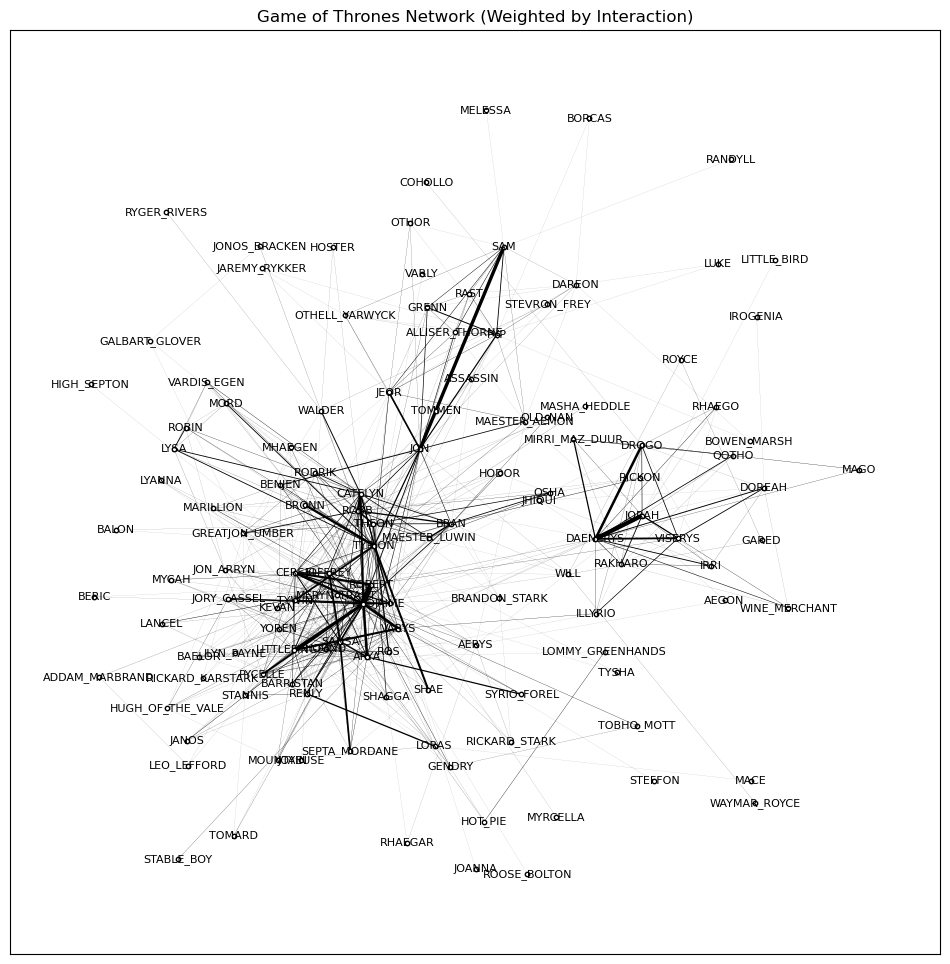

In [3]:
# Load the edges and nodes CSV files
edges_file_path = 'got-data/got-s1-edges.csv'
nodes_file_path = 'got-data/got-s1-nodes.csv'

edges_data = pd.read_csv(edges_file_path)
nodes_data = pd.read_csv(nodes_file_path)

# Debugging: Print column names to check for issues
print("Edges column names:", edges_data.columns)
print("Nodes column names:", nodes_data.columns)

# Strip leading/trailing spaces from column names if necessary
edges_data.columns = edges_data.columns.str.strip()
nodes_data.columns = nodes_data.columns.str.strip()

# Create a graph object using the edges data
G = nx.from_pandas_edgelist(edges_data, 'Source', 'Target', edge_attr=True)

# Add node attributes (like Season or other properties) from the nodes CSV
for index, row in nodes_data.iterrows():
    G.nodes[row['Id']].update(row.to_dict())

# Set node positions using spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the nodes: small circles, black outline, and size set to 10
nx.draw_networkx_nodes(
    G, pos,
    node_size=10,  # Small node size
    node_color='white',  # Fill color (can be customized)
    edgecolors='black'  # Black outline
)

# Draw edges with black color and weights influencing their thickness
nx.draw_networkx_edges(
    G, pos,
    width=[d['Weight'] / 50 for (u, v, d) in G.edges(data=True)]  # Adjust width based on Weight
)

# Draw labels for the nodes with a smaller font size
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')  # Reduced font size

# Add a title
plt.title("Game of Thrones Network (Weighted by Interaction)")

# Show the plot
plt.show()


## Witcher Dataset

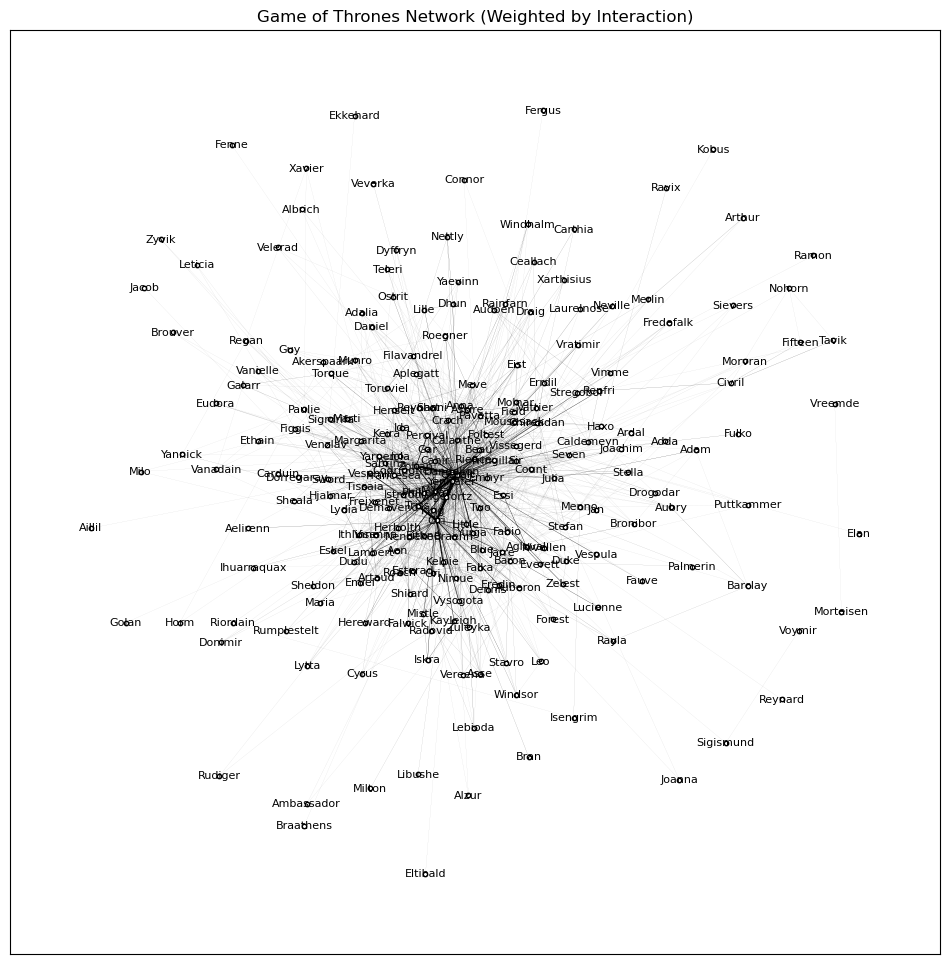

In [10]:
# Read the CSV file into a DataFrame
csv_file = 'witcher-data/witcher_network.csv'  # Replace with your actual file path
df = pd.read_csv(csv_file)

# Create a graph object using networkx
G = nx.Graph()

# Add edges to the graph with weights, ensuring bidirectionality with the largest weight
for index, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    # Check if the reverse edge already exists and compare weights
    if G.has_edge(target, source):
        # If the reverse edge exists, compare the weights and keep the larger one
        current_weight = G[target][source]['weight']
        if weight > current_weight:
            G[source][target]['weight'] = weight
    else:
        # Add the edge if it doesn't exist
        G.add_edge(source, target, weight=weight)

# Adjust layout to make nodes more sparse

# Set node positions using spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the nodes: small circles, black outline, and size set to 10
nx.draw_networkx_nodes(
    G, pos,
    node_size=10,  # Small node size
    node_color='white',  # Fill color (can be customized)
    edgecolors='black'  # Black outline
)

# Draw edges with black color and weights influencing their thickness
nx.draw_networkx_edges(
    G, pos,
    width=[d['weight'] / 50 for (u, v, d) in G.edges(data=True)]  # Adjust width based on Weight
)

# Draw labels for the nodes with a smaller font size
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')  # Reduced font size

# Add a title
plt.title("Game of Thrones Network (Weighted by Interaction)")

# Show the plot
plt.show()

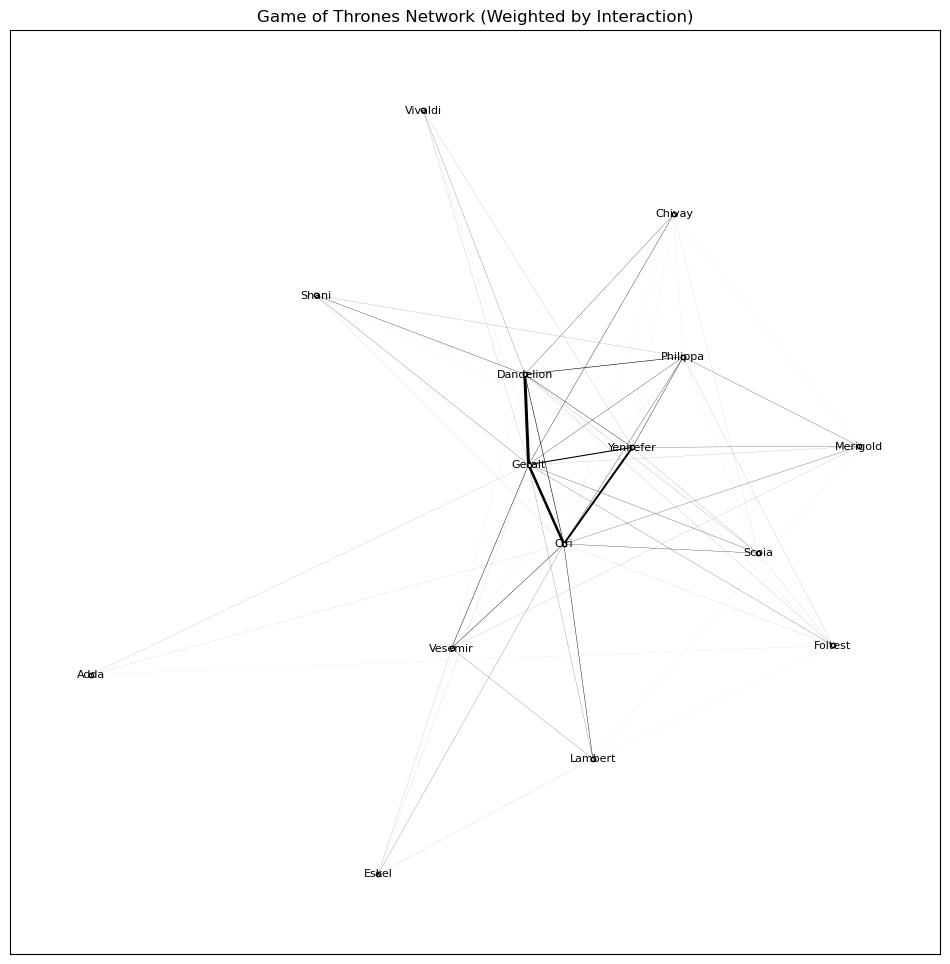

In [9]:
# Read the CSV file into a DataFrame
csv_file = 'witcher-data/witcher_small_network.csv'  # Replace with your actual file path
df = pd.read_csv(csv_file)

# Create a graph object using networkx
G = nx.Graph()

# Add edges to the graph with weights, ensuring bidirectionality with the largest weight
for index, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    # Check if the reverse edge already exists and compare weights
    if G.has_edge(target, source):
        # If the reverse edge exists, compare the weights and keep the larger one
        current_weight = G[target][source]['weight']
        if weight > current_weight:
            G[source][target]['weight'] = weight
    else:
        # Add the edge if it doesn't exist
        G.add_edge(source, target, weight=weight)

# Adjust layout to make nodes more sparse

# Set node positions using spring layout
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the nodes: small circles, black outline, and size set to 10
nx.draw_networkx_nodes(
    G, pos,
    node_size=10,  # Small node size
    node_color='white',  # Fill color (can be customized)
    edgecolors='black'  # Black outline
)

# Draw edges with black color and weights influencing their thickness
nx.draw_networkx_edges(
    G, pos,
    width=[d['weight'] / 50 for (u, v, d) in G.edges(data=True)]  # Adjust width based on Weight
)

# Draw labels for the nodes with a smaller font size
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')  # Reduced font size

# Add a title
plt.title("Game of Thrones Network (Weighted by Interaction)")

# Show the plot
plt.show()